In [1]:
#IMPORT NECESSARY PACKAGES
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, Model
from keras.callbacks import EarlyStopping

In [2]:
#LOADING DATASET
data_train=pd.read_csv("train.csv")

In [3]:
data_train


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test=pd.read_csv("test.csv")

In [5]:
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_train['label'].value_counts().sort_values()

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

In [7]:
#DEFINING x_train and y_train
y_train = data_train["label"].values
x_train = data_train.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype("float32")
x_train.shape

(42000, 28, 28, 1)

In [8]:
x_test=data_test.values.reshape(-1, 28, 28, 1).astype("float32")
x_test.shape

(28000, 28, 28, 1)

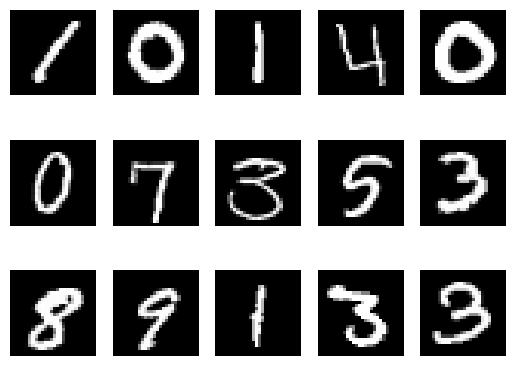

In [9]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")

In [10]:
#NORMALIZE
x_train /= 255
x_test /= 255

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_train = to_categorical(y_train)
print(y_train.shape)

(42000, 10)


In [13]:
#MODEL CREATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [14]:
def build_model():
    input = layers.Input((28, 28, 1,))
    
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(input)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPool2D((2, 2))(x)
    
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.MaxPool2D((2, 2))(x)
    
    x = layers.Conv2D(256, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, padding="same", activation="relu")(x)
    x = layers.MaxPool2D((2, 2))(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(10, activation="softmax")(x)
    
    model = Model(input, output)
    
    return model
    
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                             

In [15]:
#MODEL COMPILATION
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
             loss="categorical_crossentropy",
             metrics="accuracy")

In [16]:
model.fit(x_train, y_train, batch_size=16, epochs=5, 
                 validation_split=0.2)

Epoch 1/5
2100/2100 [==============================] - 508s 240ms/step - loss: 0.7095 - accuracy: 0.7627 - val_loss: 0.0825 - val_accuracy: 0.9771
Epoch 2/5
2100/2100 [==============================] - 513s 244ms/step - loss: 0.2178 - accuracy: 0.9376 - val_loss: 0.0555 - val_accuracy: 0.9842
Epoch 3/5
2100/2100 [==============================] - 506s 241ms/step - loss: 0.1405 - accuracy: 0.9631 - val_loss: 0.0511 - val_accuracy: 0.9873
Epoch 4/5
2100/2100 [==============================] - 508s 242ms/step - loss: 0.1046 - accuracy: 0.9725 - val_loss: 0.0384 - val_accuracy: 0.9901
Epoch 5/5
2100/2100 [==============================] - 492s 234ms/step - loss: 0.0821 - accuracy: 0.9803 - val_loss: 0.0372 - val_accuracy: 0.9910


In [17]:
#PREDITION
predictions = model.predict(x_test)
y_pred = [x.argmax() for x in predictions]

875/875 [==============================] - 78s 89ms/step


In [18]:
output=pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})

In [19]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
output.to_csv("sample_submission.csv",index=False)